<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Optimization/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# KNN

In [ ]:
import numpy as np
import pandas as pd
import timeit
from sklearn.model_selection import train_test_split
%alias_magic t timeit

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/ML/Project/density_contrast_hunthou.csv')
data.head()

,particle_id,in-halo,den_contrast for 12.4,den_contrast for 13.0,den_contrast for 13.6
0,6734555,0,-0.053916,-0.046234,-0.039032
1,12718733,1,-0.048032,-0.044974,-0.039007
2,6470459,1,-0.039389,-0.034886,-0.030631
3,12098249,1,-0.049084,-0.045819,-0.039032
4,4799280,1,-0.040202,-0.041805,-0.038101


In [ ]:
data = data.sort_values( by =['den_contrast for 12.4'])
X, Y = data.iloc[:,2:], data['in-halo']
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 75000    X_test : 25000


In [ ]:
X_test,X_train = np.array(X_test),np.array(X_train)
Y_test,Y_train = np.array(Y_test),np.array(Y_train)
X ,Y= np.array(X),np.array(Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
#check
%t Y_predict_knn = classifier.predict(X_test)

10 loops, best of 5: 57.2 ms per loop
1 loop, best of 5: 823 ms per loop


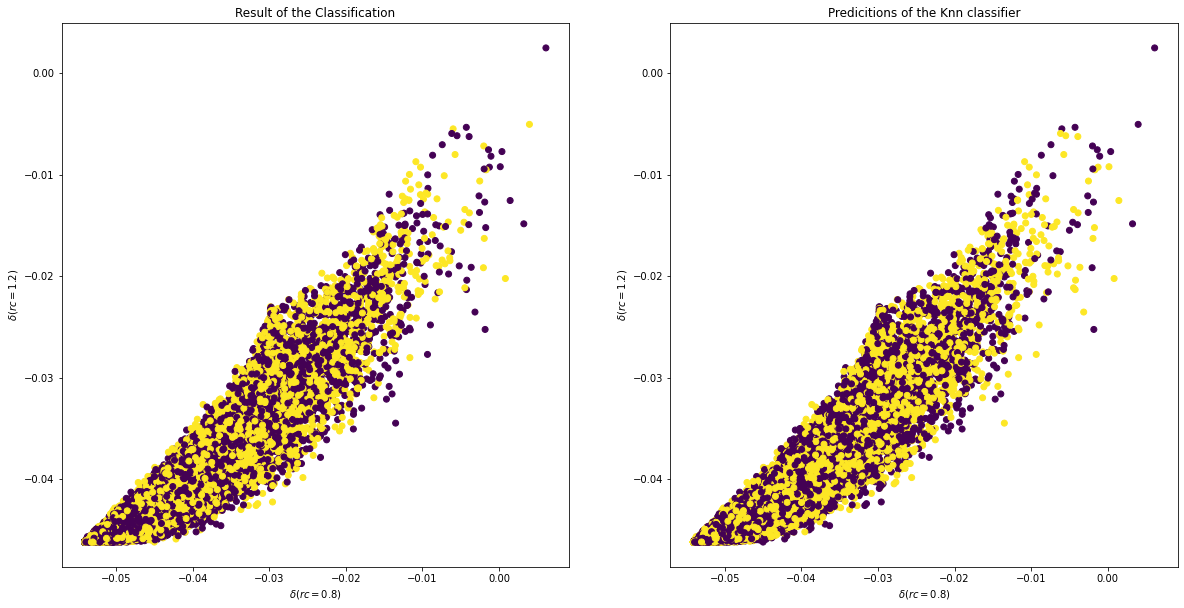

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,:2].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=0.8)$', ylabel='$\delta(rc=1.2)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,:2].T, c = Y_predict_knn)
plt.show()


plt.show()

In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     12612
           1       0.50      0.50      0.50     12388

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


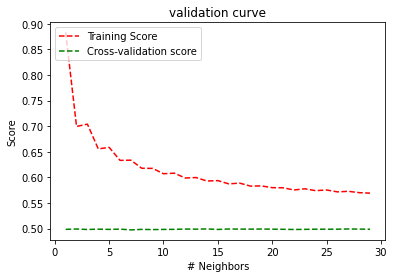

In [ ]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,30, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 28

Run-Time vs. leaf-size


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


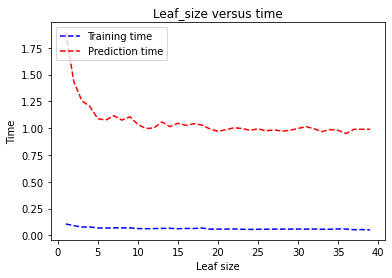

In [ ]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,48000,1000)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

print('Training scores:\n\n', pd.DataFrame( train_scores) )

print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

learning started
Training scores:

            0         1         2         3         4
0   0.652000  0.492000  0.492000  0.492000  0.492000
1   0.605500  0.497000  0.497000  0.497000  0.497000
2   0.605000  0.490667  0.490667  0.490667  0.490667
3   0.600500  0.484000  0.484000  0.484000  0.484000
4   0.596400  0.485200  0.485200  0.485200  0.485200
5   0.598833  0.487167  0.487167  0.487167  0.487167
6   0.601714  0.495714  0.495714  0.495714  0.495714
7   0.599000  0.500000  0.500000  0.500000  0.500000
8   0.596222  0.504667  0.504667  0.504667  0.504667
9   0.595800  0.507300  0.507300  0.507300  0.507300
10  0.593727  0.511091  0.511091  0.511091  0.511091
11  0.596250  0.514083  0.514083  0.514083  0.514083
12  0.592077  0.517769  0.517769  0.517769  0.517769
13  0.593571  0.517643  0.517643  0.517643  0.517643
14  0.592067  0.521400  0.521400  0.521400  0.521400
15  0.592500  0.525937  0.525937  0.525937  0.525937
16  0.592471  0.529353  0.529353  0.529353  0.529353
17  0.5929

Fine Tuning The Model

In [ ]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 25000 , random_state= 0)

print(len(X_train))
print(len(X_test))
print(len(Y))

25000
75000
100000


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=30 , p=2, metric='minkowski')
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
%t Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

100 loops, best of 5: 15 ms per loop
1 loop, best of 5: 2.62 s per loop
75000
32007


In [ ]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.51      0.58      0.54     37841
           1       0.50      0.43      0.46     37159

    accuracy                           0.50     75000
   macro avg       0.50      0.50      0.50     75000
weighted avg       0.50      0.50      0.50     75000



Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the Knn classifier: 

TP = 21797   FP = 16044 

FN = 21196   TN = 15963 



Confusion matrix, without normalization
[[21797 16044]
 [21196 15963]]
Normalized confusion matrix
[[0.57601543 0.42398457]
 [0.57041363 0.42958637]]


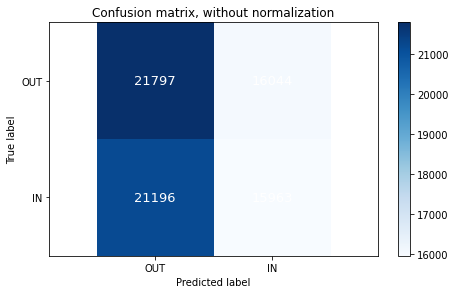

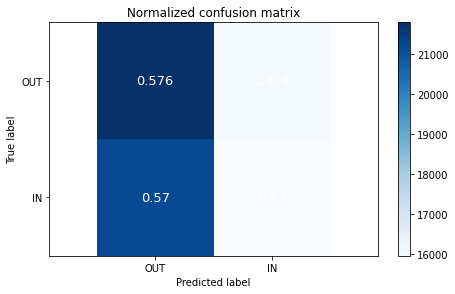

In [ ]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Acurracy

In [ ]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 50.347%


Recall

In [ ]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.576
The precision for Knn classifier: 
 0.507


Precision - Recall curve

[[0.4  0.6 ]
 [0.35 0.65]
 [0.5  0.5 ]
 ...
 [0.3  0.7 ]
 [0.4  0.6 ]
 [0.45 0.55]]
[1 1 0 ... 1 1 1]


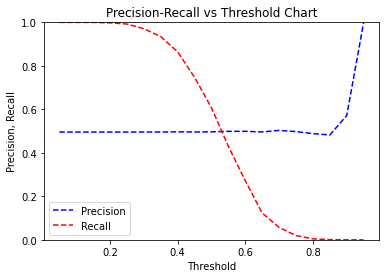

In [ ]:
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# scale model

lrg = LogisticRegression()
tst_size = 0.2
ns, nf = np.shape(X)
# split data to train and test 
# X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
# cross validation
# scores = cross_val_score(svc, X_train, Y_train, cv=5 ,scoring= 'recall')
# print(scores)
param_grid=  { 'solver':{'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},'penalty':{'l1', 'l2', 'elasticnet', 'none'},'fit_intercept'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf','linear','sigmoid']}
# evaluate hyper-parameters 
clf = GridSearchCV(svc, param_grid, scoring = 'f1', cv = 5 ,verbose = 1, n_jobs=-1, return_train_score=1)
# train model
trained_model = clf.fit(X_train, Y_train)
# predict data
Y_pred = trained_model.predict(X_test)
# scores = cross_val_score(clf.best_estimator_, X_train, Y_train, cv=5 ,scoring= 'accuracy')
# print(scores)
print(clf.best_score_)